In [1]:
import sys
import os
# add the folder mmerkat_analysis_pipeline
sys.path.insert(0, os.getcwd())
import HeartRatePipeline
import PulseOxygenationPipeline
import RespRateAndVolumePipeline
import FlowVolumeLoopsPipeline
from ventiliser.GeneralPipeline import GeneralPipeline
import SummaryStatistics
import AsymmetryPipeline

# Needs to be edited by user:
# Define folder of the dataset
database_path = r"C:\Users\silas\Master Project\Meerkat Vital Sign Monitoring\dataset"

# Heart rate analysis

1  :  mk001
2  :  mk004
3  :  mk005
4  :  mk019
5  :  mk021
6  :  mk023
7  :  mk025
8  :  mk026
9  :  mk045
10  :  mk047
11  :  mk501
12  :  mk502
13  :  mk503
14  :  mk504


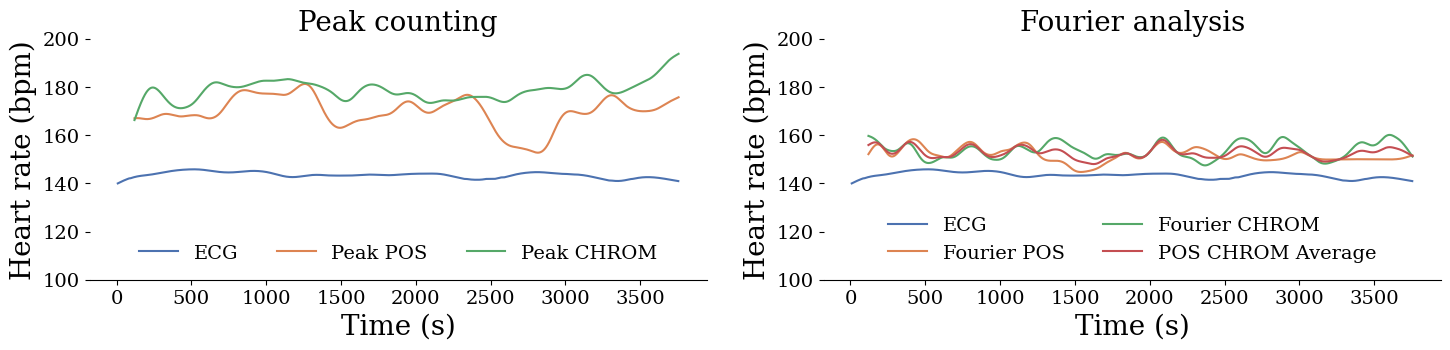

POS Peak counting
Data points: 1689
MAD: 26.374451642017362
MAD: 18.377265118668262 %
MSE: 743.3499651177963
CP 10 %: 0.09177027827116636
CP 20 %: 0.6039076376554174
CHROM peak counting
Data points: 1689
MAD: 35.44960364593744
MAD: 24.700675236608298 %
MSE: 1278.1893524540264
CP 10 %: 0.0
CP 20 %: 0.0645352279455299
POS Fourier analysis
Data points: 1689
MAD: 8.49996271956155
MAD: 5.922628099206653 %
MSE: 79.25026580149363
CP 10 %: 1.0
CP 20 %: 1.0
CHROM Fourier analysis
Data points: 1689
MAD: 10.195164023148635
MAD: 7.103815265043366 %
MSE: 116.61288762189783
CP 10 %: 0.8271166370633511
CP 20 %: 1.0
CHROM and POS
Data points: 1689
MAD: 9.347563371355092
MAD: 6.513221682125009 %
MSE: 92.87217692428558
CP 10 %: 1.0
CP 20 %: 1.0


In [4]:
hr = HeartRatePipeline.Calculate_heart_rate()
hr.data_analysis_folder = database_path
hr.run()
#7 for example

# Pulse oxygenation

1  :  mk001
2  :  mk004
3  :  mk005
4  :  mk019
5  :  mk021
6  :  mk023
7  :  mk025
8  :  mk026
9  :  mk045
10  :  mk047
11  :  mk501
12  :  mk502
13  :  mk503
14  :  mk504


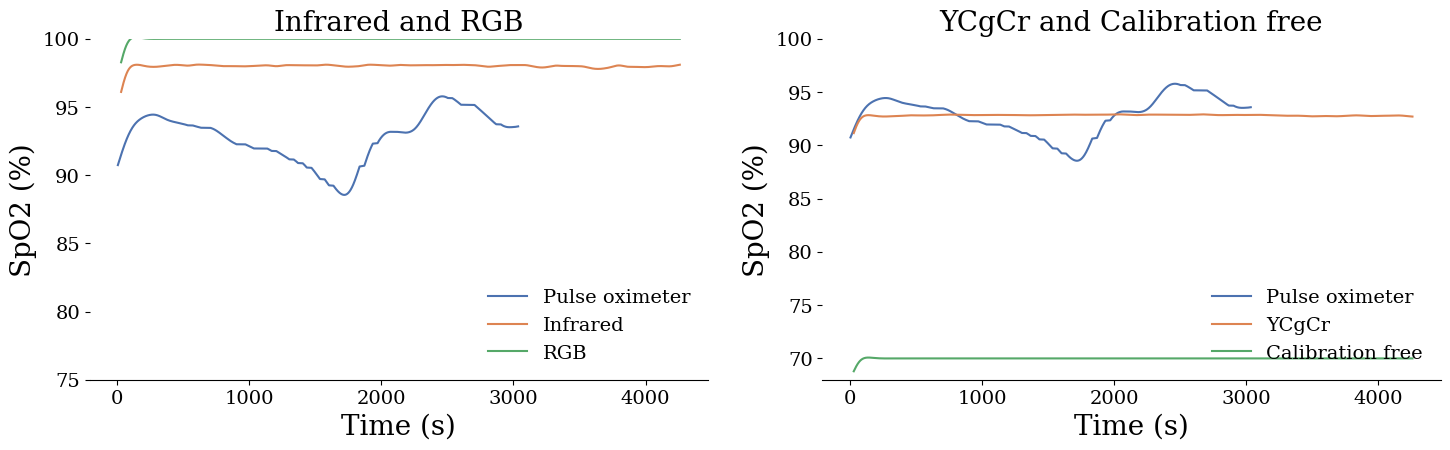

Oxygen saturation YCgCr
Data points: 1135
MAD: 1.455932820693201
MSE: 3.3171634972521606
CP 3 %: 0.8555066079295154
CP 6 %: 1.0
Oxygen saturation Infrared
Data points: 1135
MAD: 5.083651082501677
MSE: 29.06779043888482
CP 3 %: 0.07577092511013216
CP 6 %: 0.7030837004405286
Oxygen saturation RGB
Data points: 1135
MAD: 7.0547616275047185
MSE: 53.01921001008926
CP 3 %: 0.0
CP 6 %: 0.16387665198237886
Oxygen saturation calibration free
Data points: 1135
MAD: 22.93977668310685
MSE: 529.4848595276933
CP 3 %: 0.0
CP 6 %: 0.0


In [12]:
ox = PulseOxygenationPipeline.CalculatePulseOxygenation()
ox.intervall_length = 900
ox.data_analysis_folder = database_path
ox.run()
# 5 for image

# Respiratory rate and tidal volume

1  :  mk001
2  :  mk004
3  :  mk005
4  :  mk019
5  :  mk021
6  :  mk023
7  :  mk025
8  :  mk026
9  :  mk045
10  :  mk047
11  :  mk501
12  :  mk502
13  :  mk503
14  :  mk504
Mean tidal volume(ml):  6.239219164518198


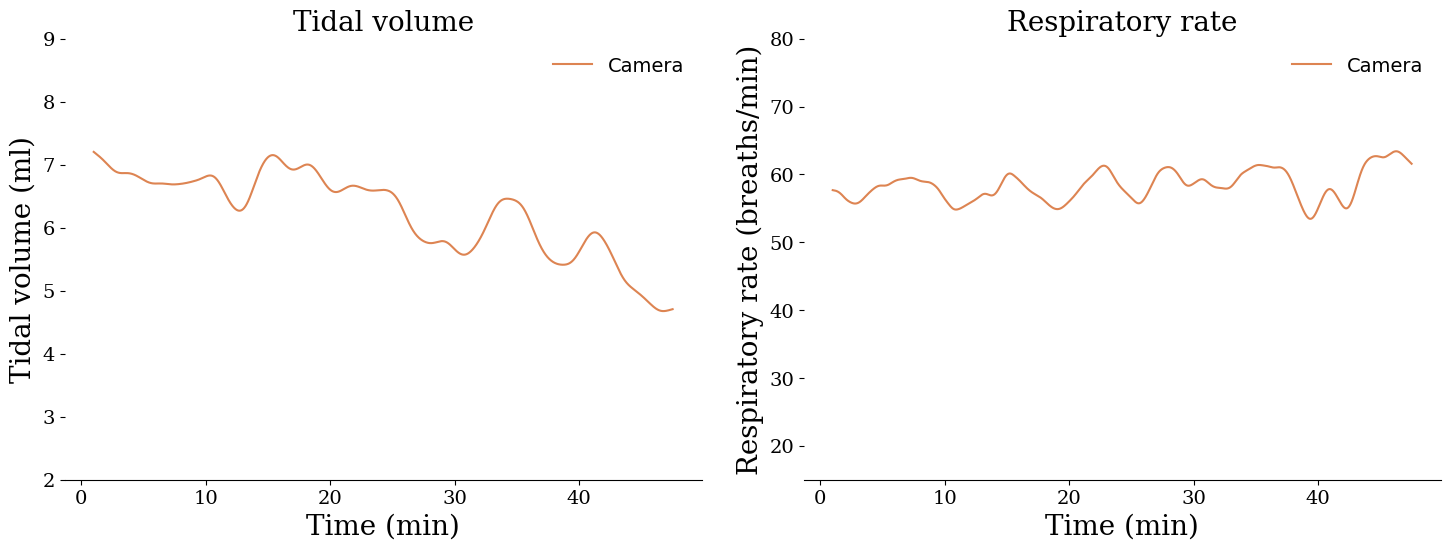

In [15]:
Resp = RespRateAndVolumePipeline.Respiratory_rate_and_volume_pipeline()
Resp.data_analysis_folder = database_path
Resp.run()

# Flow-volume loops

1  :  mk001
2  :  mk004
3  :  mk005
4  :  mk019
5  :  mk021
6  :  mk023
7  :  mk025
8  :  mk026
9  :  mk045
10  :  mk047
11  :  mk501
12  :  mk502
13  :  mk503
14  :  mk504
08/07 11:41 :        0 /   120235 (  0.00%): Labelling pressure states 
08/07 11:41 :   120235 /   120235 (100.00%): Labelling pressure states 
08/07 11:41 :        0 /   120235 (  0.00%): Labelling flow states 
08/07 11:41 :   120235 /   120235 (100.00%): Labelling flow states 
Segmenting into breaths
4295 breaths identified
08/07 11:41 :        0 /     4295 (  0.00%): Processing breaths 
08/07 11:41 :     4295 /     4295 (100.00%): Processing breaths 
08/07 11:41 :        0 /     4294 (  0.00%): Post-processing 
08/07 11:41 :     4294 /     4294 (100.00%): Post-processing 
08/07 11:41 :        0 /     4117 (  0.00%): Re-numbering breaths 
08/07 11:41 :     4117 /     4117 (100.00%): Re-numbering breaths 


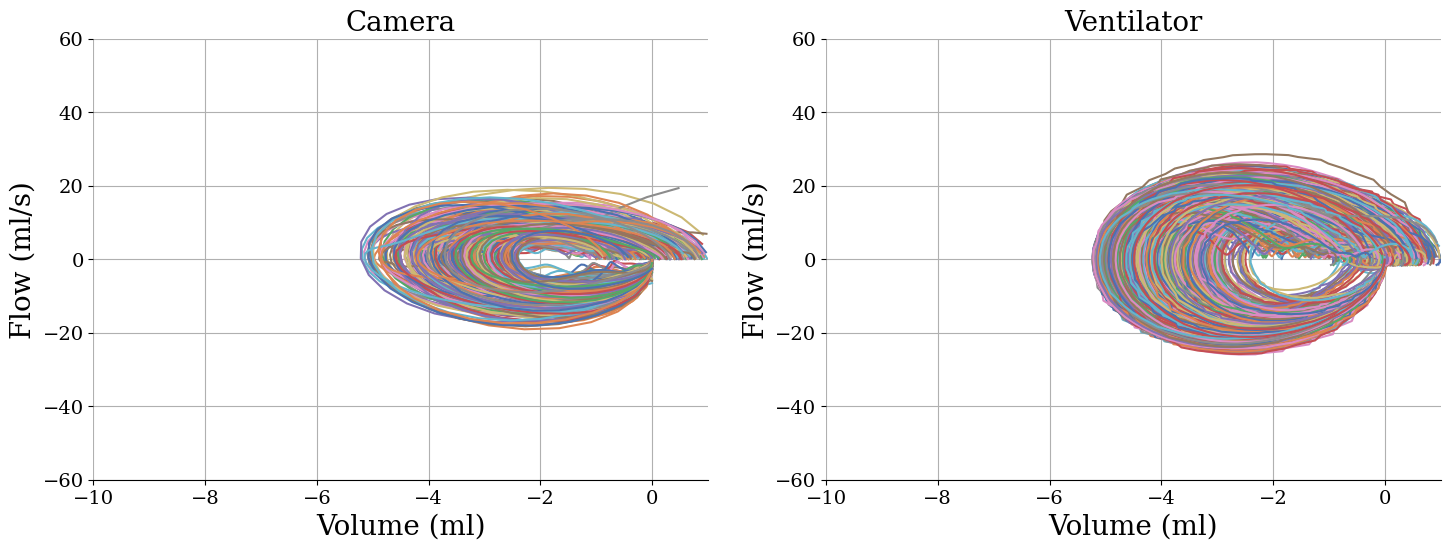

In [3]:
if __name__ == "__main__":
    fv = FlowVolumeLoopsPipeline.CalculateFlowVolumeLoop(data_analysis_folder=database_path, plot_single_loops_flag=False)
    intermediate_file, has_ventilator = fv.run_part1()

    # use ventiliser to calculate beginning and end of breaths using bandpass filtered data
    if has_ventilator:
        pipeline = GeneralPipeline()
        pipeline.configure()  # For information on parameters you can configure see docs
        pipeline.load_data(
            intermediate_file, [0, 1, 2]
        )  # [0,1,2] refers to the columns in your data file corresponding to time, pressure, flow

        pipeline.process()  # You can suppress log and output files by setting them false. See docs for more information

    fv.run_part2()  # intermediate_file, intermediate_folder, subject_file)
    
#5 is example
#3 as well

# Asymmetry

1  :  mk001
2  :  mk004
3  :  mk005
4  :  mk019
5  :  mk021
6  :  mk023
7  :  mk025
8  :  mk026
9  :  mk045
10  :  mk047
11  :  mk501
12  :  mk502
13  :  mk503
14  :  mk504


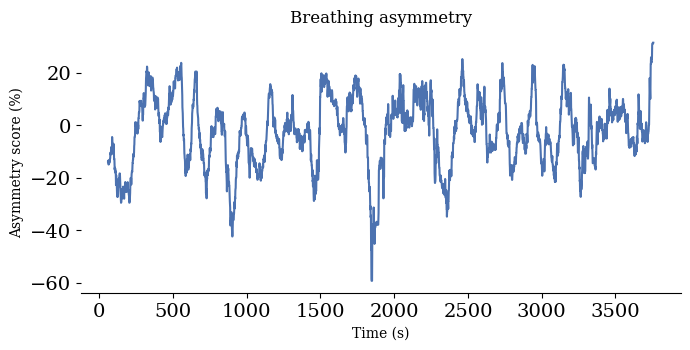

In [2]:
asym = AsymmetryPipeline.BreathingAsymmetry()
asym.data_analysis_folder = database_path
asym.run()
#mk047 has positive asymmetry
#mk026 is very balanced
#mk502 has large negative
#needs pics to add to stuff

# Characterisation of ground truth data set

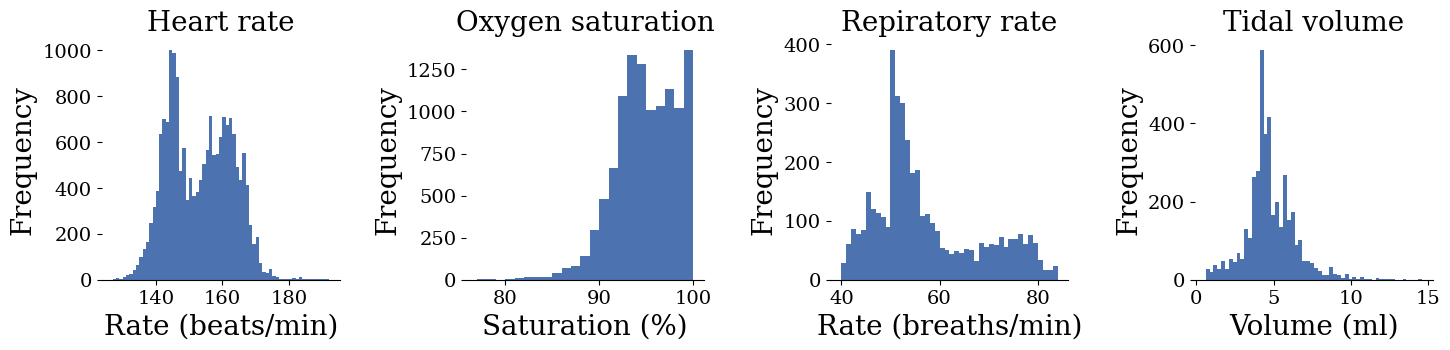

In [5]:
SummaryStatistics.ground_truth_characterisation(database_path)

# Summary statistics heart rate

Number of subjects:  11
POS_Fourier_analysis
CP 5 %: 0.5212728551336147
CP 10 %: 0.9080520393811533
MAD: 7.86020984878685
MSE: 86.33085310952703


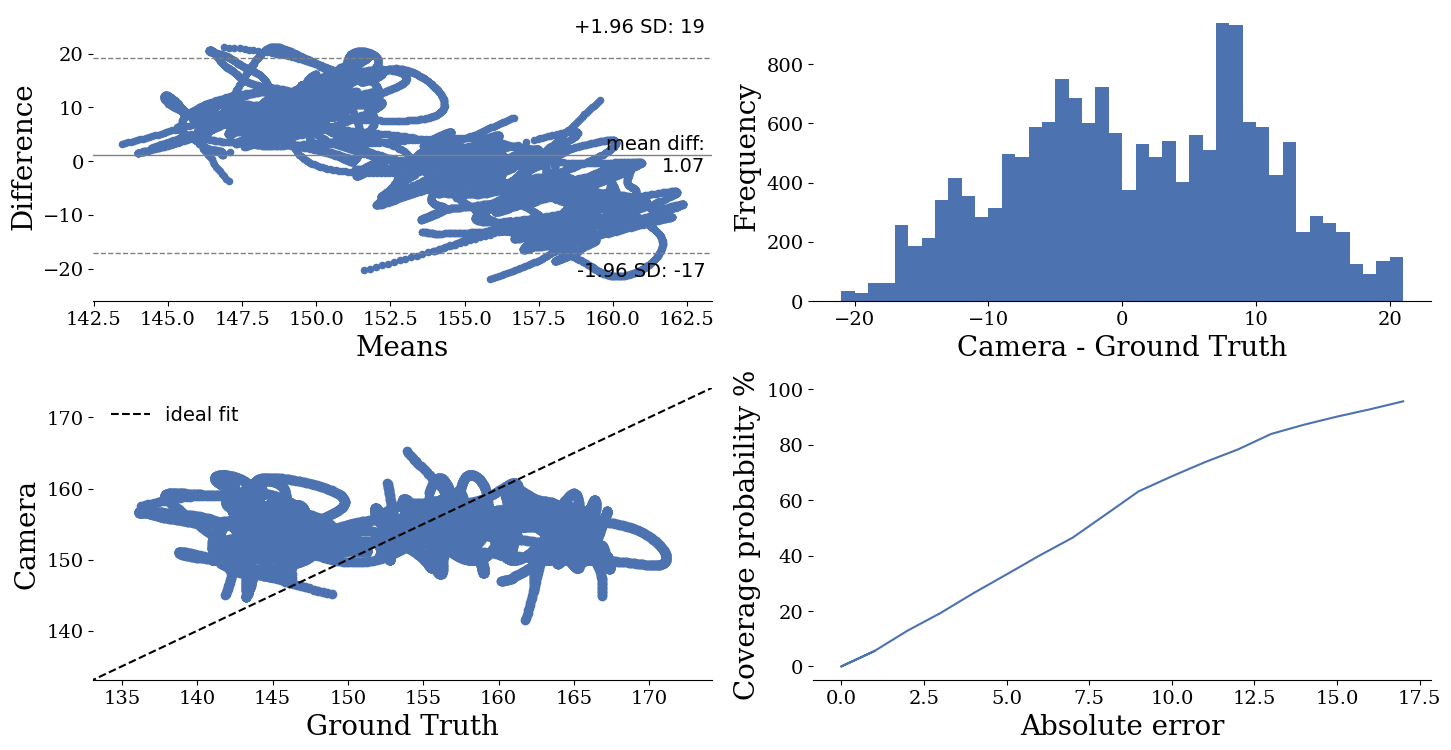

Number of subjects:  11
CHROM_Fourier_analysis
CP 5 %: 0.509493670886076
CP 10 %: 0.9392873886544773
MAD: 7.736236439258611
MSE: 83.16978300154152


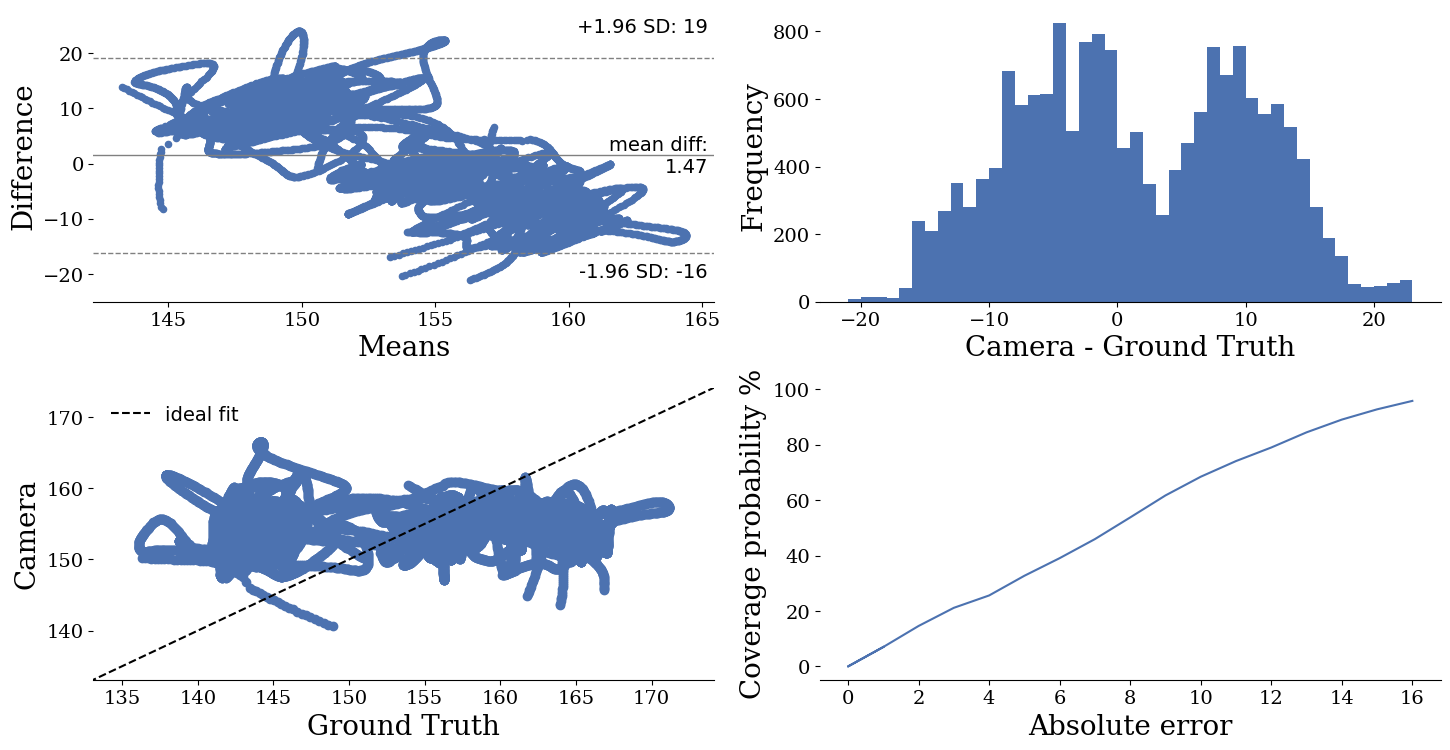

Number of subjects:  11
CHROM_Peak_counting
CP 5 %: 0.026840131270511016
CP 10 %: 0.07858649789029536
MAD: 30.91214600147151
MSE: 1053.71868032298


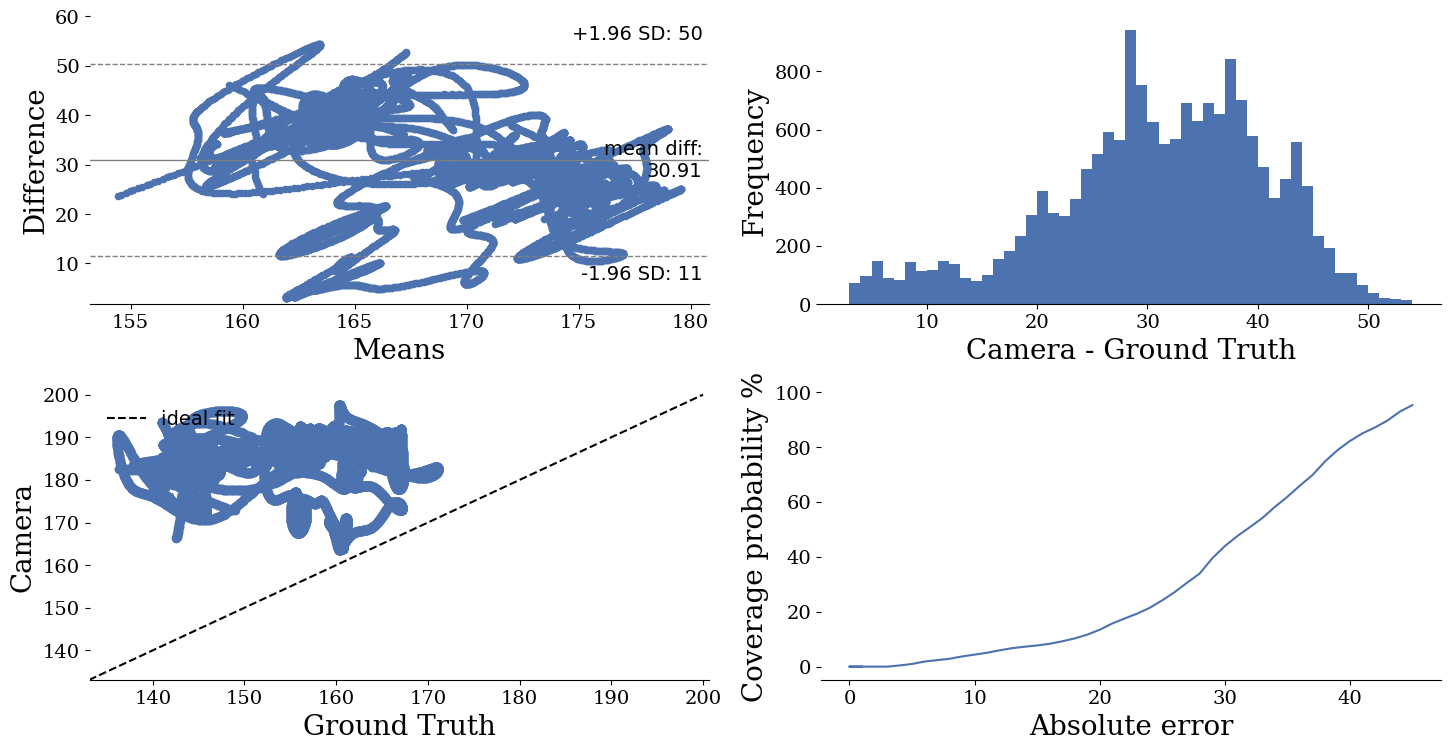

Number of subjects:  11
POS_Peak_counting
CP 5 %: 0.013127051101734646
CP 10 %: 0.0981012658227848
MAD: 29.11936175181629
MSE: 943.9987022306888


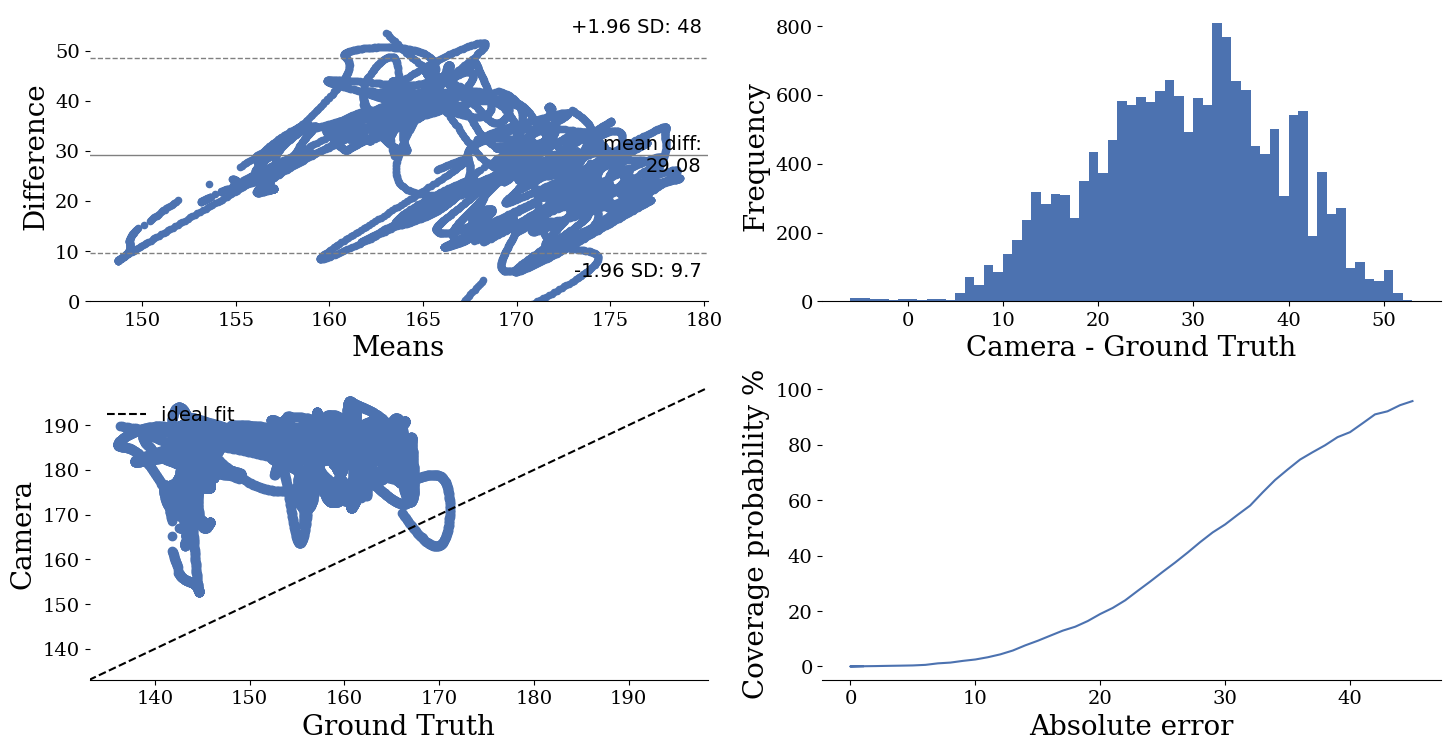

Number of subjects:  11
CHROM_POS
CP 5 %: 0.5092006563525551
CP 10 %: 0.9292662916080637
MAD: 7.718274069869378
MSE: 81.8384759057065


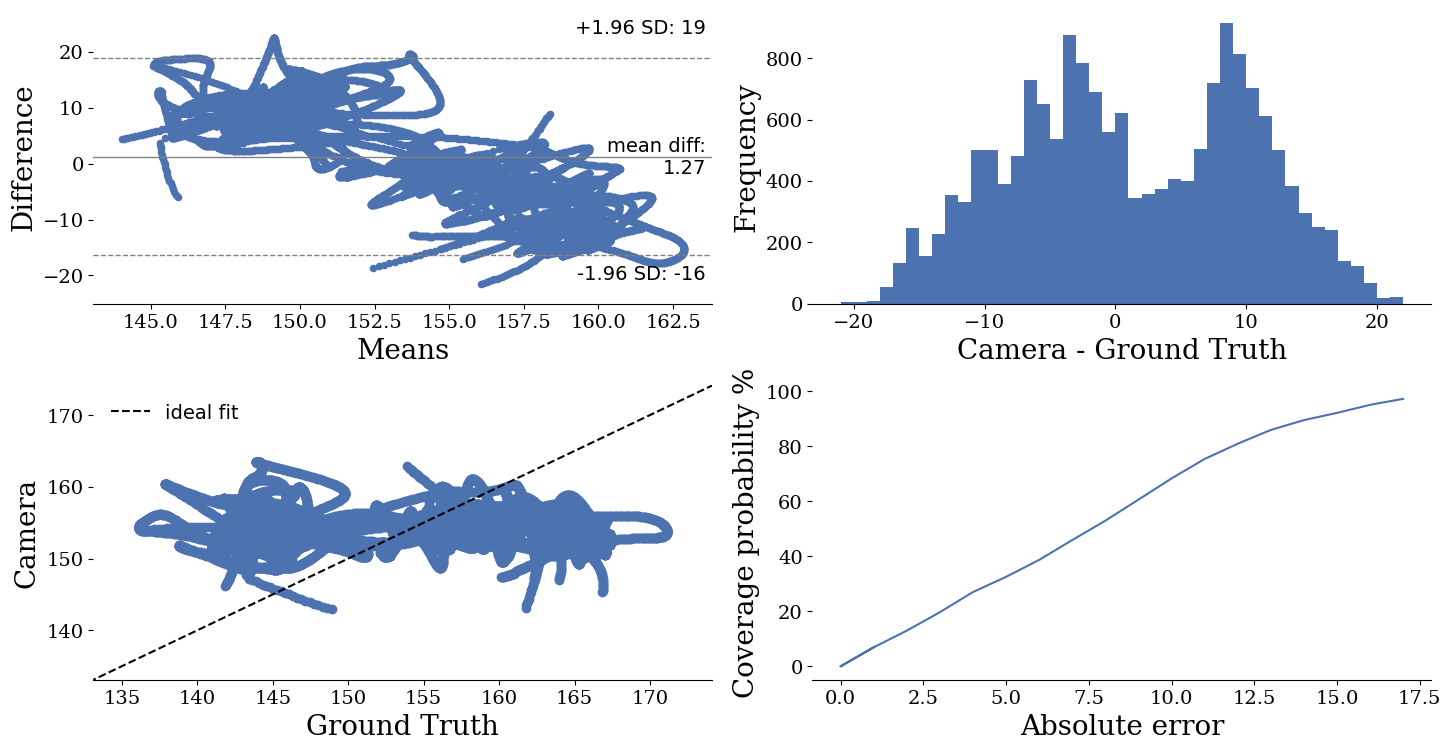

In [6]:
SummaryStatistics.vital_sign_summary_statistics(database_path, "POS_Fourier_analysis")
SummaryStatistics.vital_sign_summary_statistics(database_path, "CHROM_Fourier_analysis")
SummaryStatistics.vital_sign_summary_statistics(database_path, "CHROM_Peak_counting")
SummaryStatistics.vital_sign_summary_statistics(database_path, "POS_Peak_counting")
SummaryStatistics.vital_sign_summary_statistics(database_path, "CHROM_POS")

# Summary statistics oxygen saturaton

Number of subjects:  7
calibration_free_oxygen_saturation
CP 3 %: 0.11126831733198585
CP 6 %: 0.3352198079838302
MAD: 15.344987581650493
MSE: 337.63469071566135


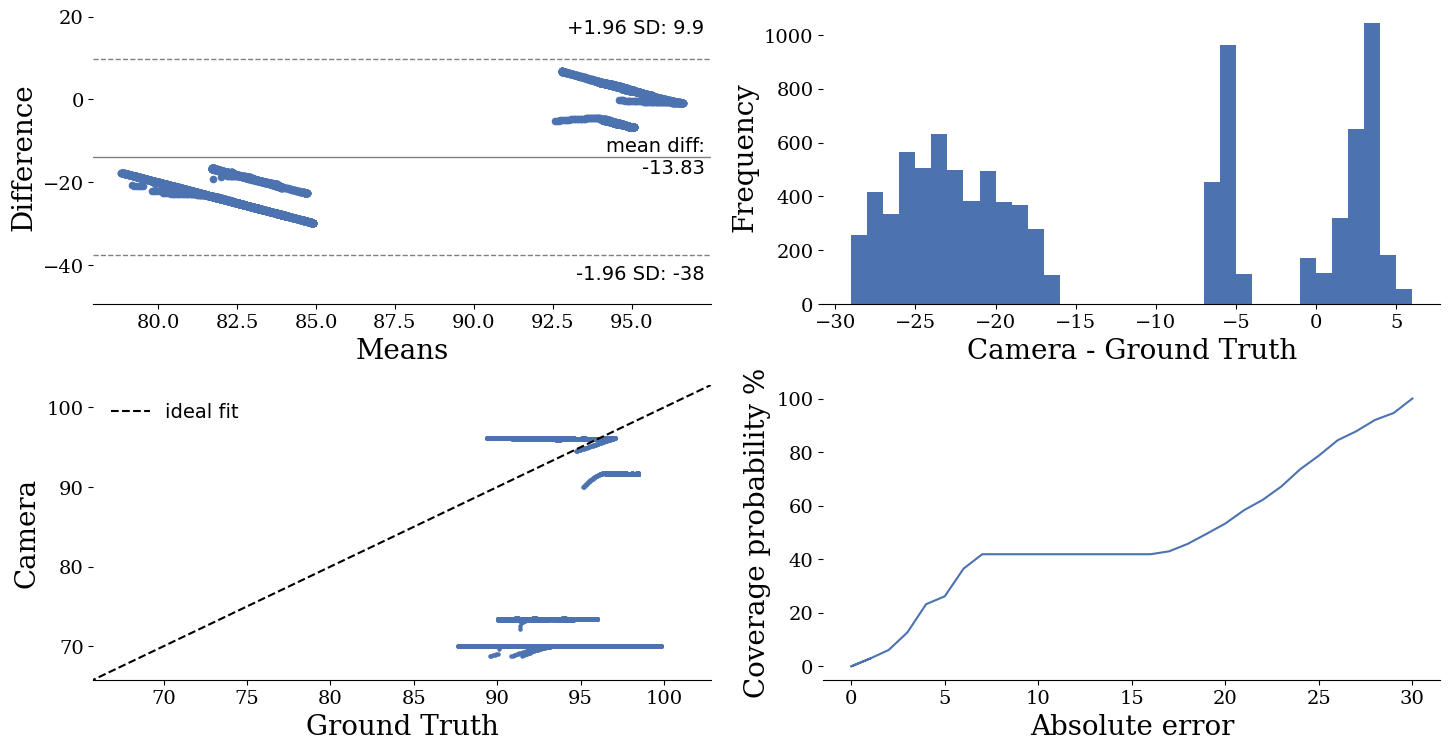

Number of subjects:  7
infrared_oxygen_saturation
CP 3 %: 0.5302678120262759
CP 6 %: 0.8424456796361799
MAD: 3.248080764184053
MSE: 15.874432332838207


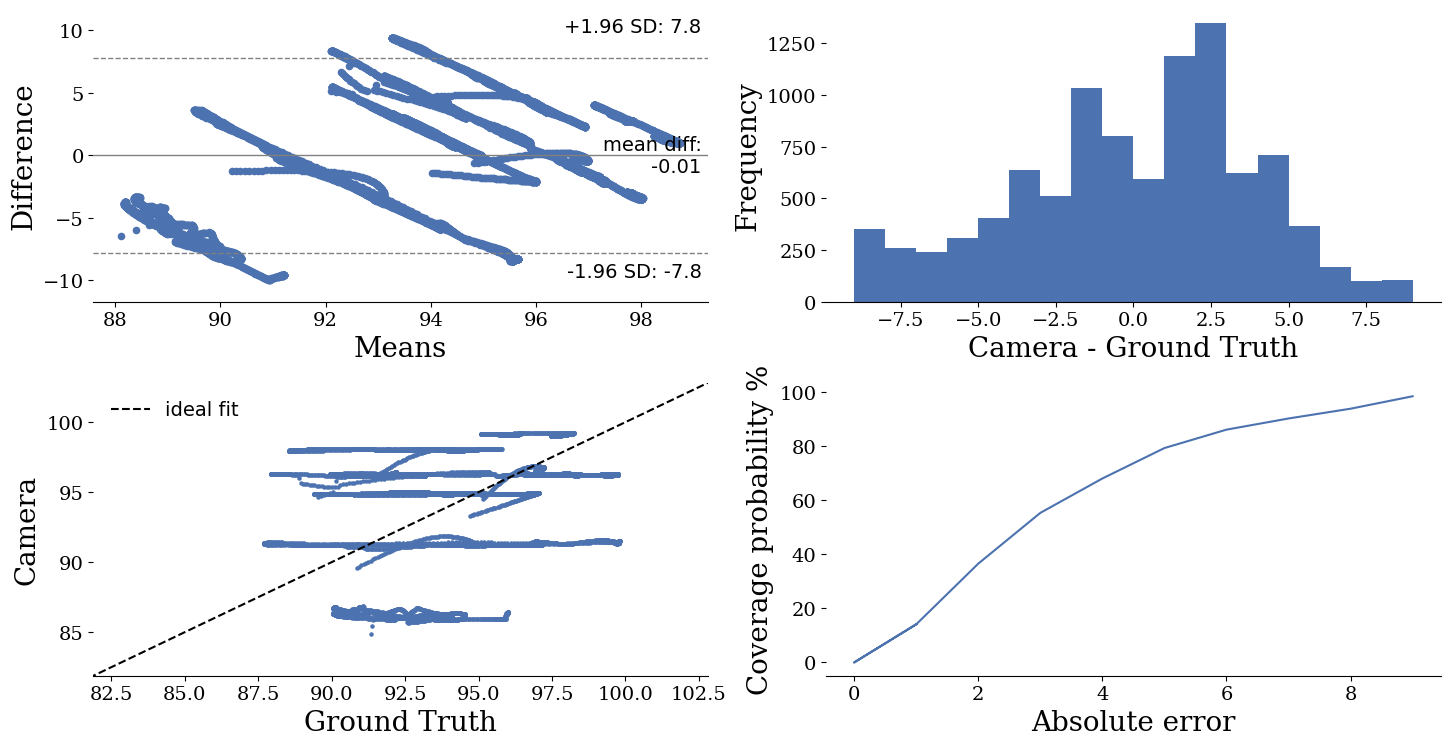

Number of subjects:  7
ycgcr_oxygen_saturation
CP 3 %: 0.5914098029307732
CP 6 %: 0.714300151591713
MAD: 3.7855660010832883
MSE: 28.777750747501404


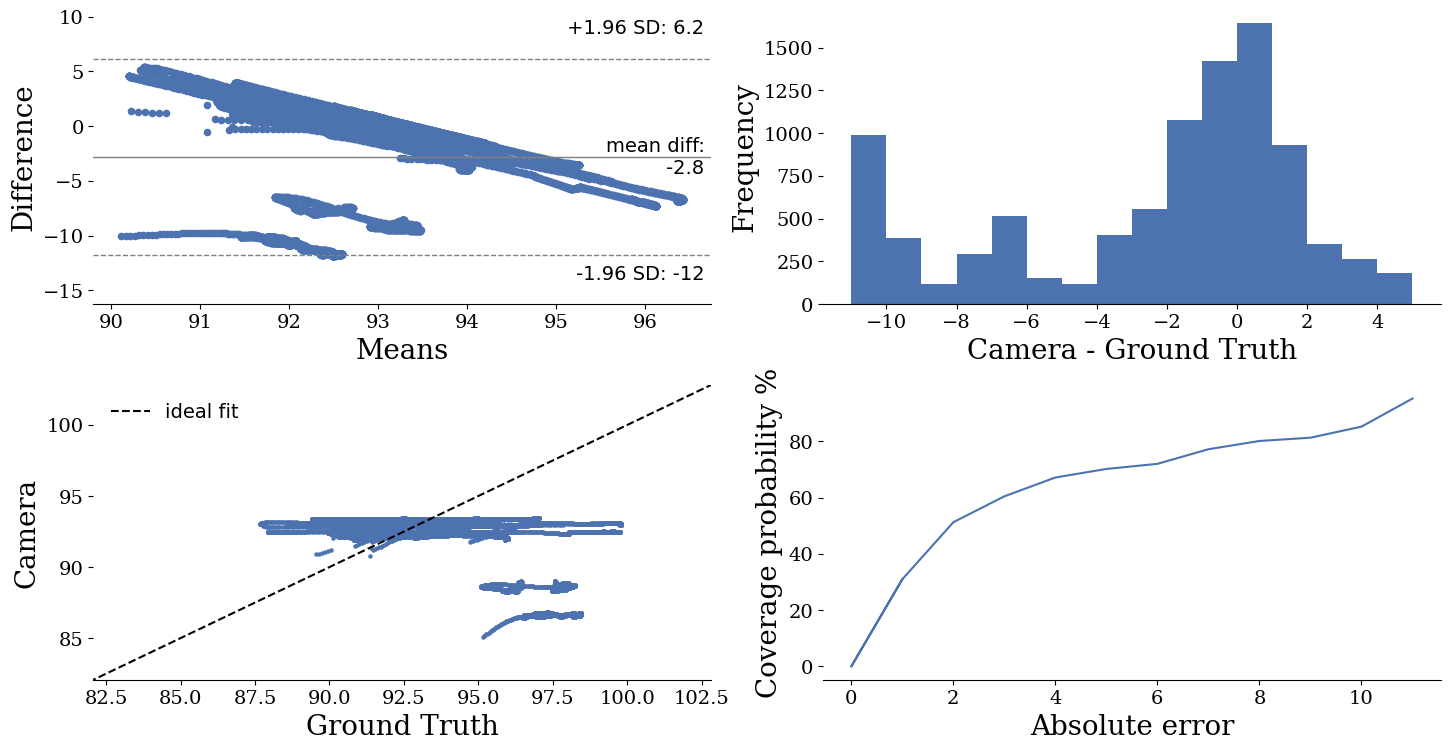

Number of subjects:  7
rgb_oxygen_saturation
CP 3 %: 0.3098534613441132
CP 6 %: 0.44426478019201615
MAD: 7.200381849722721
MSE: 75.86935412112675


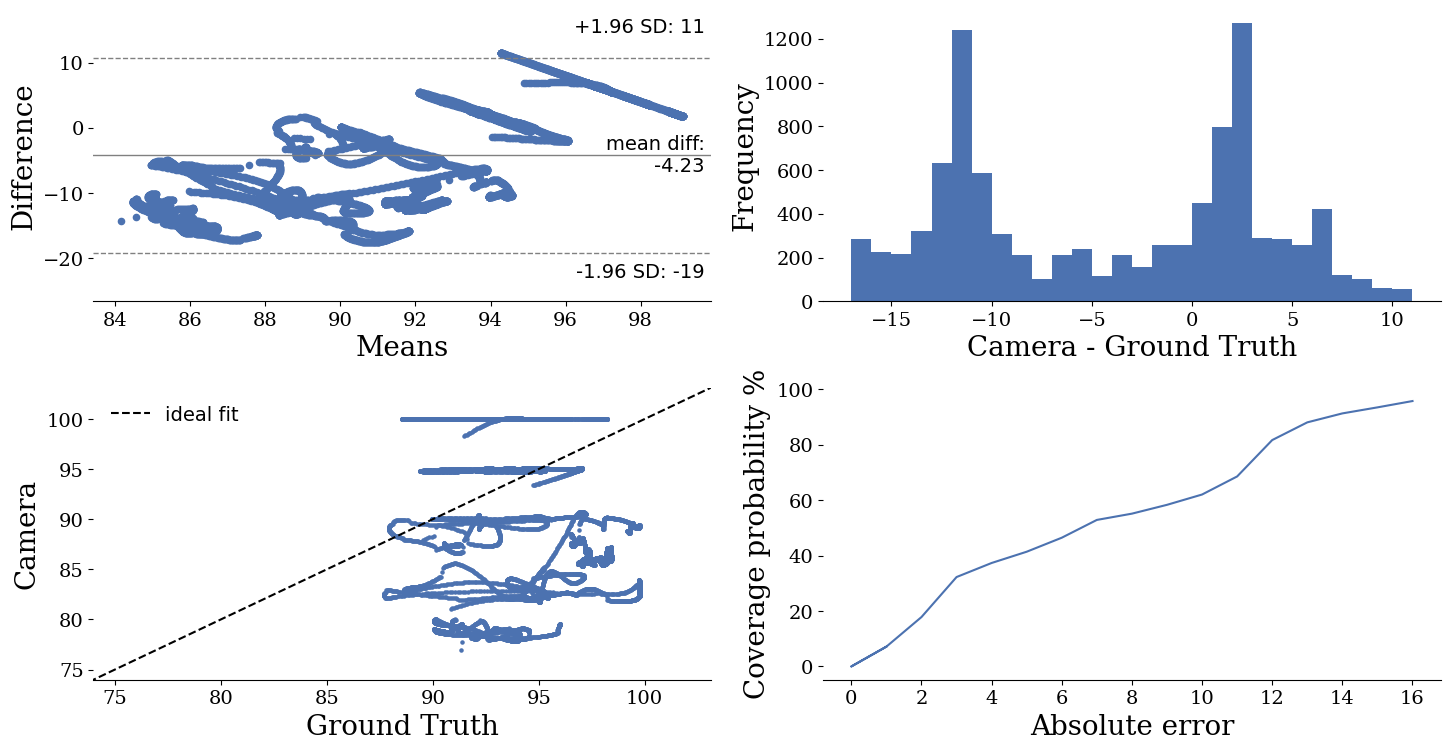

In [13]:
#SummaryStatistics.vital_sign_summary_statistics(database_path, "calibration_free_oxygen_saturation")
SummaryStatistics.vital_sign_summary_statistics(database_path, "infrared_oxygen_saturation")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "ycgcr_oxygen_saturation")
#SummaryStatistics.vital_sign_summary_statistics(database_path, "rgb_oxygen_saturation")

# Summary statistics respiratory rate and volume

Number of subjects:  3
Resp_Fourier
CP 10 %: 0.623574144486692
CP 20 %: 0.9251901140684411
MAD: 4.773050785770025
MAD: 8.488193377171257 %
MSE: 37.721020212181465


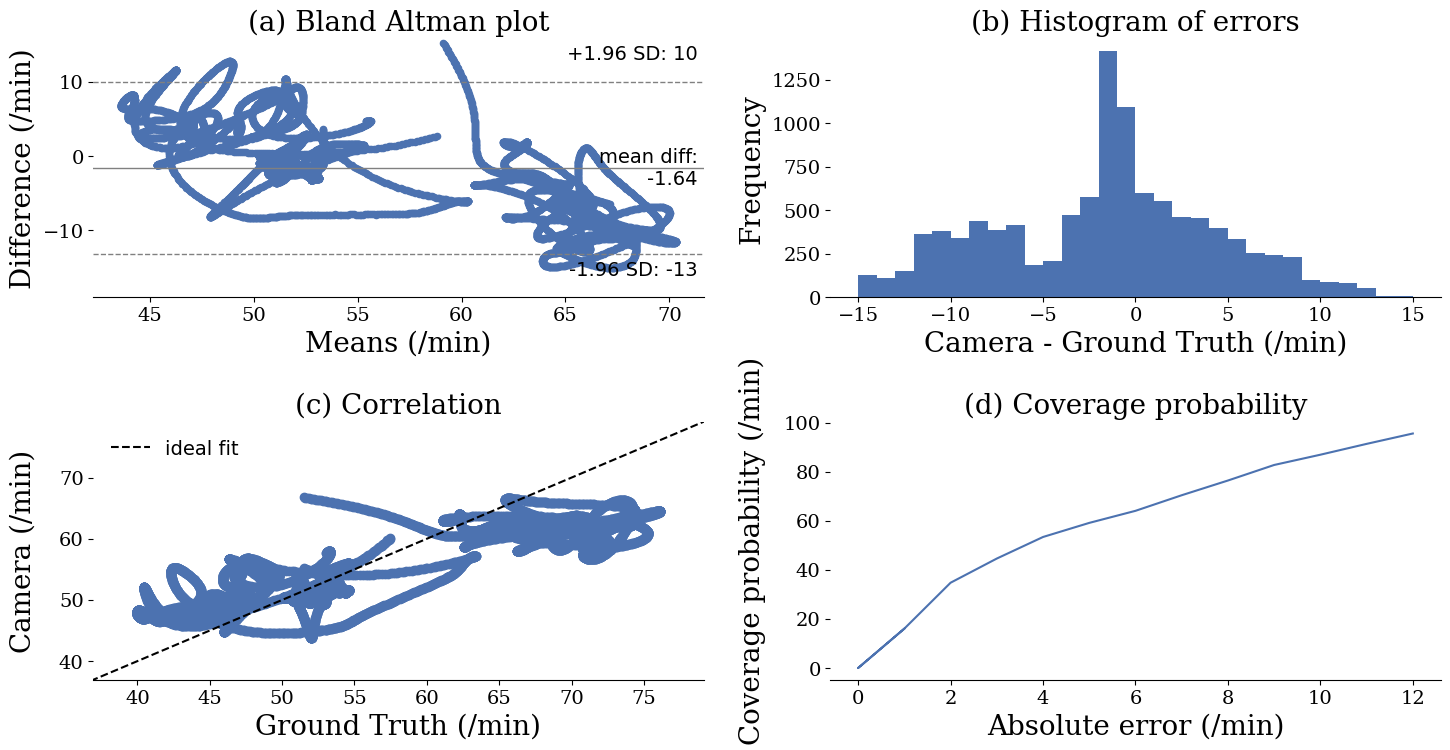

Number of subjects:  3
Resp_Peak_counting
CP 10 %: 0.02623574144486692
CP 20 %: 0.11815589353612167
MAD: 23.10345526413543
MAD: 41.08621608373886 %
MSE: 645.009700528173


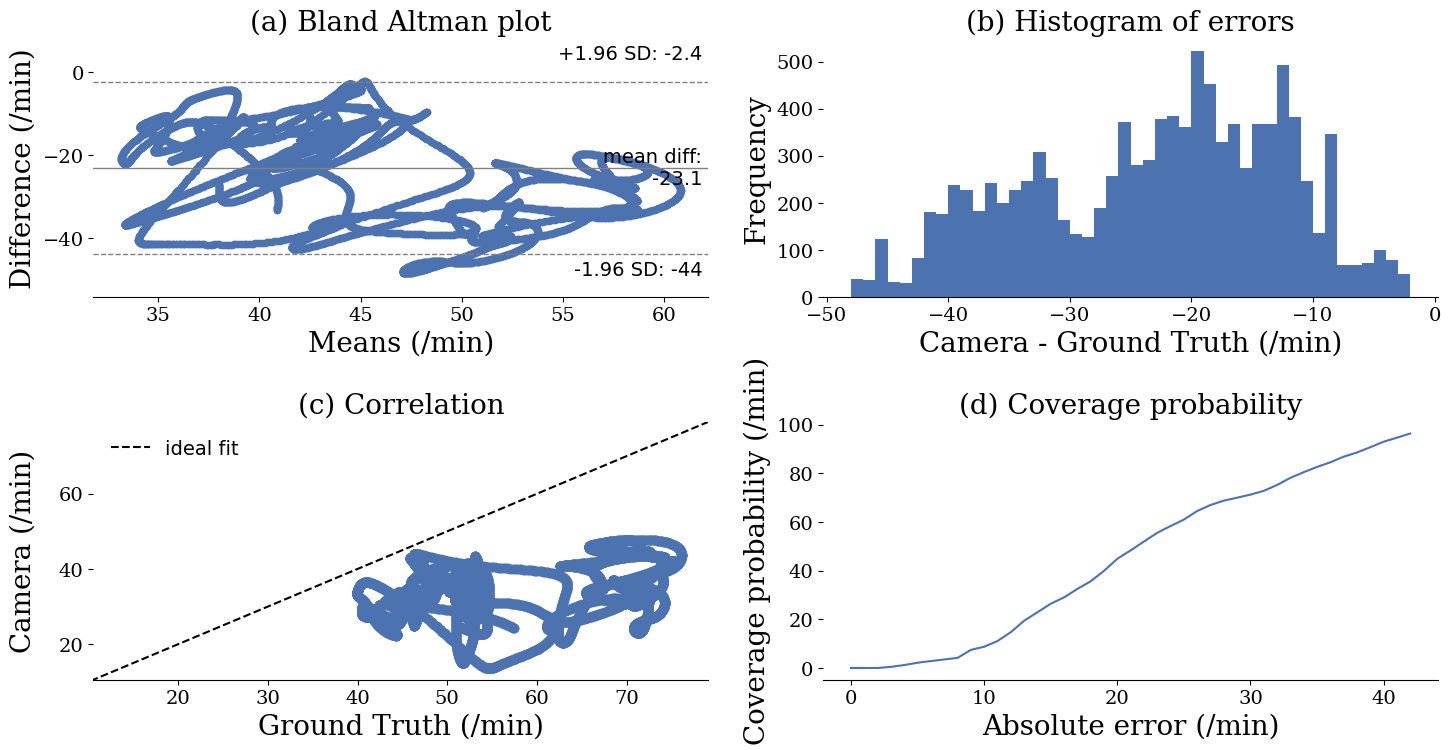

Number of subjects:  6
Tidal_volume
CP 10 %: 0.3168250950570342
CP 20 %: 0.6369771863117871
MAD: 0.8249328236822308
MAD: 17.043638155798615 %
MSE: 0.9760926286378937


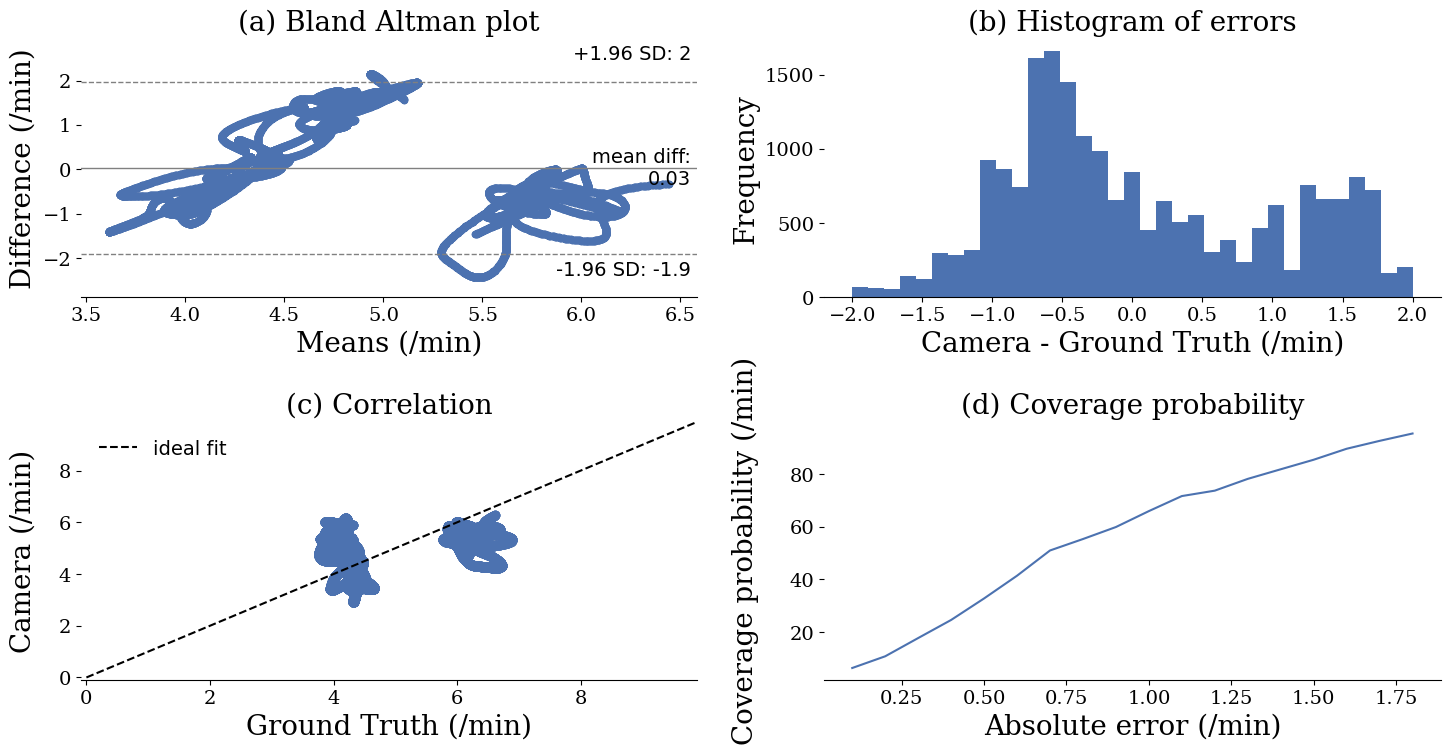

Number of subjects:  3
Tidal_volume_upper_lower
CP 10 %: 0.5534220532319392
CP 20 %: 0.7488593155893536
MAD: 0.581498587769062
MAD: 12.339768497365718 %
MSE: 0.5867421544495403


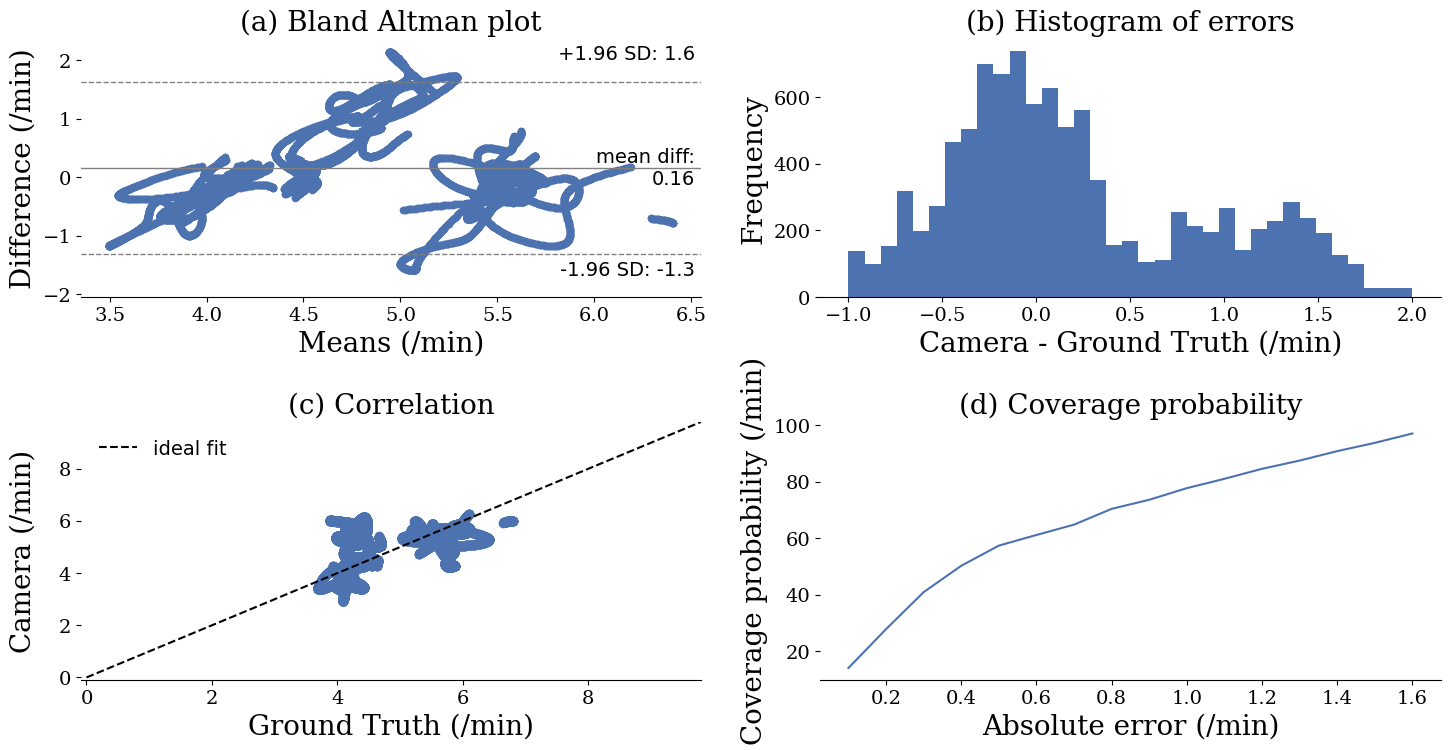

In [5]:
SummaryStatistics.vital_sign_summary_statistics(database_path, "Resp_Fourier")
SummaryStatistics.vital_sign_summary_statistics(database_path, "Resp_Peak_counting")
SummaryStatistics.vital_sign_summary_statistics(database_path, "Tidal_volume")
SummaryStatistics.vital_sign_summary_statistics(database_path, "Tidal_volume_upper_lower")